In [1]:
# import re
from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
tqdm.pandas()

In [3]:
# !ls -1 data

In [4]:
ts = '2022-09-02_13-04'

In [5]:
df = (
    pd.read_excel(f'data/avito_{ts}.xlsx')
    .merge( pd.read_pickle(f'data/location/avito_{ts}_location.pkl'), on='adr')
)
print(len(df))
df.sample(3)[['title','adr','latitude','longitude','priceM']]

3763


,title,adr,latitude,longitude,priceM
935,"квартира-студия, 25 м², 1/1 эт.","улица Шварца, 20",44.60,33.52,3.50
146,"1-к. квартира, 48 м², 5/10 эт.","улица Военных Строителей, стр. 6.2",44.57,33.41,4.85
2524,"2-к. квартира, 54 м², 3/3 эт.","улица Ленина, 34",44.61,33.53,12.60


In [6]:
gdf = gpd.GeoDataFrame( 
    df[['title','adr','priceM','latitude','longitude']],
    geometry = gpd.points_from_xy(df['longitude'], df['latitude']),
).set_crs(epsg=3857) # Spheric Mercator (EPSG:3857)

gdf

,title,adr,priceM,latitude,longitude,geometry
0,"1-к. квартира, 53 м², 9/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",8.47,44.60,33.51,POINT (33.512 44.604)
1,"1-к. квартира, 75 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",11.31,44.60,33.51,POINT (33.512 44.604)
2,"1-к. квартира, 60 м², 5/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",9.03,44.60,33.51,POINT (33.512 44.604)
3,"1-к. квартира, 75 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",11.31,44.60,33.51,POINT (33.512 44.604)
4,"1-к. квартира, 67 м², 2/10 эт.","улица Генерала Крейзера, д. 8, корп. 5",10.08,44.60,33.51,POINT (33.512 44.604)
...,...,...,...,...,...,...
3758,"1-к. квартира, 49 м², 2/10 эт.","проспект Античный, д. 26, корп. 5",8.10,44.59,33.44,POINT (33.436 44.594)
3759,"2-к. квартира, 49 м², 2/2 эт.","1-я Бастионная улица , 7",7.30,44.61,33.55,POINT (33.550 44.613)
3760,"3-к. квартира, 83 м², 1/8 эт.","улица Павла Корчагина, 5",13.90,44.58,33.43,POINT (33.434 44.583)
3761,"3-к. квартира, 120 м², 1/1 эт.","СТ Рубин, 58",10.30,44.54,33.58,POINT (33.585 44.541)


<AxesSubplot:>

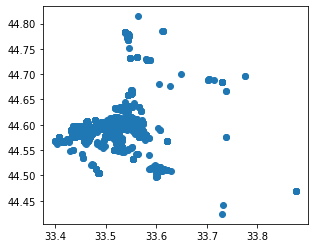

In [7]:
gdf.plot()

In [8]:
from shapely.geometry import Polygon

coo = pd.read_csv('data/ostr.csv',header=None)

<AxesSubplot:>

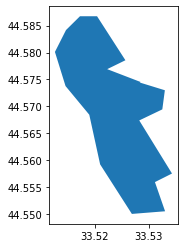

In [9]:
gdf_frames = gpd.GeoDataFrame(
        { 'name': ['Севастополь, микрорайон Острякова',],},
        geometry=[ Polygon( coo[[1,0]].values ), ],
    ).set_crs(epsg=3857)

gdf_frames.plot()

---

<AxesSubplot:>

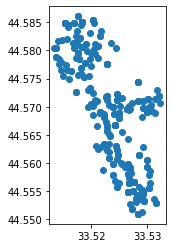

In [10]:
gdf_ = gdf.sjoin(gdf_frames, how='inner', predicate='within')
gdf_.plot()

In [11]:
gdf_[['priceM']].describe().T

,count,mean,std,min,25%,50%,75%,max
priceM,330.00,8.47,8.53,1.99,5.91,7.20,9.00,93.00


---

In [ ]:
# import contextily as cx

# ax = gdf_.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
# # cx.add_basemap(ax, zoom=11, source=cx.providers.Stamen.Watercolor)
# # cx.add_basemap(ax, zoom=11, source=cx.providers.Stamen.TonerLabels)
# cx.add_basemap(ax, zoom=11, source=cx.providers.Stamen.TonerLite )

---

In [ ]:
# gdf_['geometry']

In [15]:
from folium import Map
from folium.features import GeoJson
from folium.plugins import HeatMap

In [18]:
gjson = gdf_.to_json()

start_pos = (44.578330, 33.516509)

Map( start_pos, zoom_start=14, ).add_child( GeoJson(gjson) )
# Map( start_pos, zoom_start=14, ).add_child( gdf_[['latitude','longitude',]].values )

In [21]:
Map(location=start_pos,zoom_start=15).add_child( HeatMap( gdf_[['latitude','longitude',]] ))
#,radius=12.,min_opacity=3.))
# m.add_child( cmap )
# m

---

In [ ]:
# df_ = df.query(
#     '~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)'
#     '&(nrooms==2)'
# )

# df_[['priceM']].describe().T    

In [ ]:
# cols = ['adr', 'priceM', 'nrooms', 'floor', 'nfloors', 'area', 'description', 'avito_id',]
# df_[cols].sort_values(by=['priceM'])[:20]

----

In [ ]:
# !pip install folium

In [ ]:
# import numpy as np
# # import folium
# from folium import Map
# from folium import plugins
# from folium.plugins import HeatMap

In [ ]:
# # data_hm = df[ ~df['latitude'].isnull() ][['latitude','longitude','priceM']] 
# data_hm = df[ ~df['latitude'].isnull() ][['latitude','longitude']] 
# data_hm['indicator'] = 1 # будем смотреть количество предложений по районам
# # data_hm[['priceM']].describe(np.linspace(.0,1.,s))[4:-1].T

__FIXME:__ HeatMap некорректно отображает цены, суммирует окрестность, а нужна медиана/минимум/максимум

In [ ]:
# start_pos = (44.578330, 33.516509)
# m = folium.Map(location=start_pos,zoom_start=15)
# m.add_child( HeatMap(data_hm)) #,radius=12.,min_opacity=3.))
# # m.add_child( cmap )
# m

---

In [ ]:
# # import geopandas as gpd
# from shapely.geometry import Polygon

# ostr_frame = pd.read_csv('data/ostr.csv',header=None)
# # ostr_frame[[1,0]].values.tolist()

# polygon_geom = Polygon( ostr_frame[[1,0]].values )
# #polygon_geom2 = polygon_geom.convex_hull # the atribute
# # polygon_geom2

# m = folium.Map(location=ostr_frame.values[0],zoom_start=14)
# folium.GeoJson(polygon_geom).add_to(m)
# # folium.GeoJson(polygon_geom2).add_to(m)
# # folium.LatLngPopup().add_to(m)
# m

---

In [ ]:
# import geopandas as gpd
# from shapely.geometry import Point

# gdf = gpd.GeoDataFrame( df[['adr','title','priceM']] )
# gdf['coo'] = gpd.GeoSeries([ Point(p) for p in df[['latitude','longitude']].values ])

# gdf
# # gdf.plot()
# # gpd.GeoDataFrame( df[['adr','title','priceM','latitude','longitude']] )

---

In [ ]:
# import folium

# df__ = df_[ ~df_['coo'].isnull() ]
# df__ = df__.query('priceM<6.').sample(50)[['title','priceM','adr','coo','avito_id']]

# m = folium.Map(location=(44.5764241, 33.4685554),zoom_start=12)

# for d in df__.values:
#     title,price,adr,coo,avito_id = d
#     tooltip = f'{price}M&nbsp;|&nbsp;'+title+'&nbsp;| '+ adr
#     popup = f'<a target="_blank" href="https://www.avito.ru/{avito_id}">{tooltip}</a>'
#     folium.Marker(coo,popup=popup,tooltip=tooltip).add_to(m)
    
# m

---

In [ ]:
# df__ = df_[ ~df_['coo'].isnull() ]
# df__ = df__.query('priceM<6.').sample(50)[['title','priceM','adr','coo','avito_id']]

# m = folium.Map(location=(44.5764241, 33.4685554),zoom_start=12)

# for d in df__.values:
#     title,price,adr,coo,avito_id = d
#     tooltip = f'{price}M&nbsp;|&nbsp;'+title+'&nbsp;| '+ adr
#     popup = f'<a target="_blank" href="https://www.avito.ru/{avito_id}">{tooltip}</a>'
#     folium.Marker(coo,popup=popup,tooltip=tooltip).add_to(m)
    
# m

In [ ]:
# from  matplotlib import cm
# # from matplotlib.colors import rgb2hex

# s = 10
# pmp = data_hm[['priceM']].describe(np.linspace(.0,1.,s))[3:-1].values.flatten()
# cmap = cm.get_cmap('rainbow', s)
# # gradient_map = { pmp[i]: rgb2hex( cmap(i) ) for i in range(s)  }
# # gradient_map
# # # rgb2hex( cmap(1) )

# cmap

# .style.background_gradient(cmap='rainbow')

In [ ]:
# cities = pd.read_csv ('../datasets/us.csv'))
# cord = cities [["latitude","longitude","score"]]
# base_map = folium.Map( width = "100%",  height = "100%",  location = [-15.788497,-47.879873], zoom_start = 4 ) 
# base_map = base_map.add_child(plugins.HeatMap(cord,radius = 20, min_opacity = 0.1))  
    

In [ ]:
# import branca.colormap as cm
# colormap = cm.LinearColormap(colors=['darkblue', 'blue', 'cyan', 'yellow', 'orange', 'red'],
#                              index=[0, 25, 62.5, 156.25, 390.6, 1000], vmin=0, vmax=1000,
#                              caption='Total Standard deviation at the point[mm]')
# f_map.add_child(colormap)


In [ ]:
# # https://github.com/python-visualization/folium/issues/1374
    
# import folium.plugins
# import branca
# import branca.colormap as cm

# fname = 'test_colorbar.html'
# # Load Folium map object, working with Open Street Map and zoom of 17
# # Note that 17-zoom is maximum possible zoom
# base_lat = 50.682294344
# base_lon = 10.939628989
# f_map = folium.Map(location=[base_lat,base_lon], tiles="OpenStreetMap", zoom_start=17)

# lat_ = [50.6823, 50.6822, 50.6821, 50.6820, 50.6819]
# lon_ = [10.9396291, 10.9396279, 10.9396269, 10.9396265, 10.9396261]
# acc_ = [11.0,44.5,149.9,319.1,540.0,752.6]

# colormap = cm.LinearColormap(colors=['darkblue', 'blue', 'cyan', 'yellow', 'orange', 'red'],
#                              index=[0, 25, 62.5, 156.25, 390.6, 1000], vmin=0, vmax=1000,
#                              caption='Total Standard deviation at the point[mm]')

# fg = folium.FeatureGroup(name=fname.split('.')[0])    

# for pt in range(len(lat_)):
#     color = colormap(acc_[pt])
#     fg.add_child(folium.CircleMarker(location=[lat_[pt],lon_[pt]],
#                                      radius=6,
#                                      fill=True,
#                                      color=color,
#                                      fill_color=color))

# f_map.add_child(fg)
# f_map.add_child(colormap)
# # Save the result as an HTML file
# #print('Saving the map file...')
# # f_map.save(fname)

# f_map

In [ ]:
# import branca.colormap as bcm
# from  matplotlib import cm
# from matplotlib.colors import rgb2hex

# pmap = np.linspace(3.,10.,16) # шкала цен в млн руб.

# rainbow = cm.get_cmap('rainbow', len(pmap))
# colors = [ rgb2hex( rainbow(i) ) for i in range(len(pmap))  ]
# #cmap = bcm.LinearColormap( colors=colors, index=pmap, vmin=pmap[0], vmax=pmap[-1]) # ,caption='')
# cmap = bcm.StepColormap( colors=colors, index=pmap, vmin=pmap[0], vmax=pmap[-1]) # ,caption='')

# cmap